In [1]:
import math
import numpy as np
from matplotlib import pyplot as plt

import Kelly_functions
import Plotting_functions
import Calculations

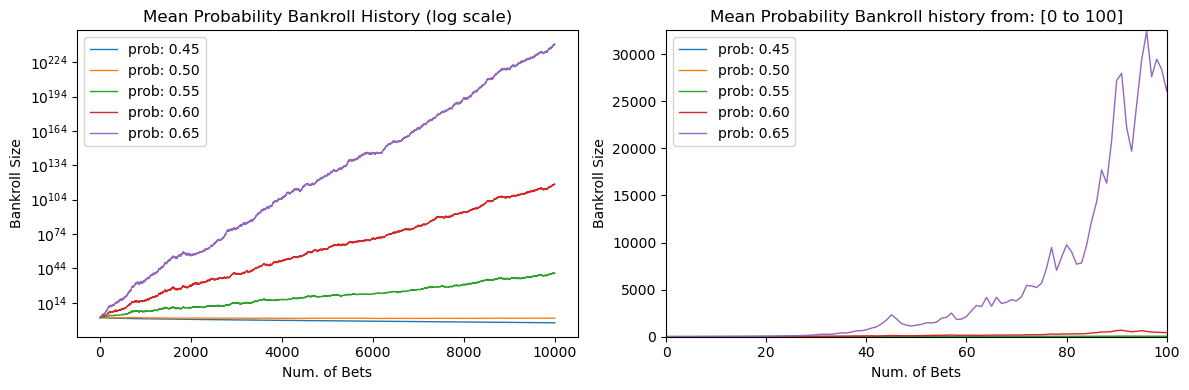

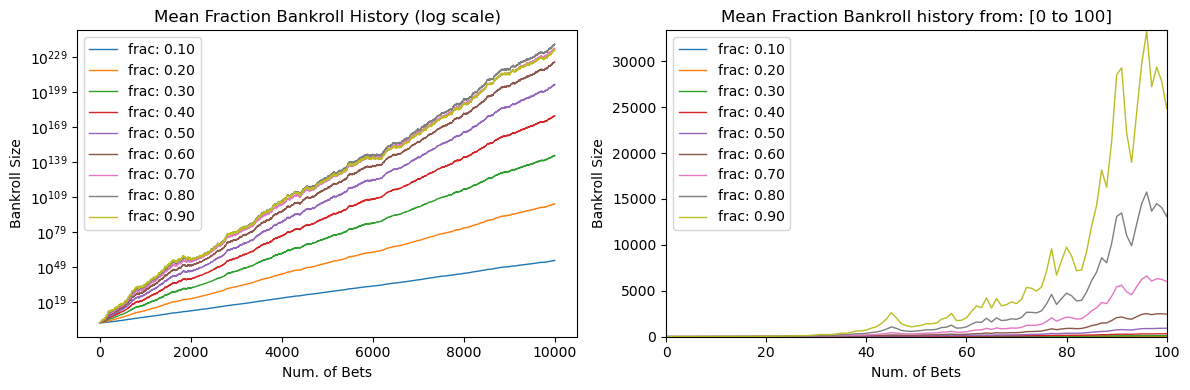

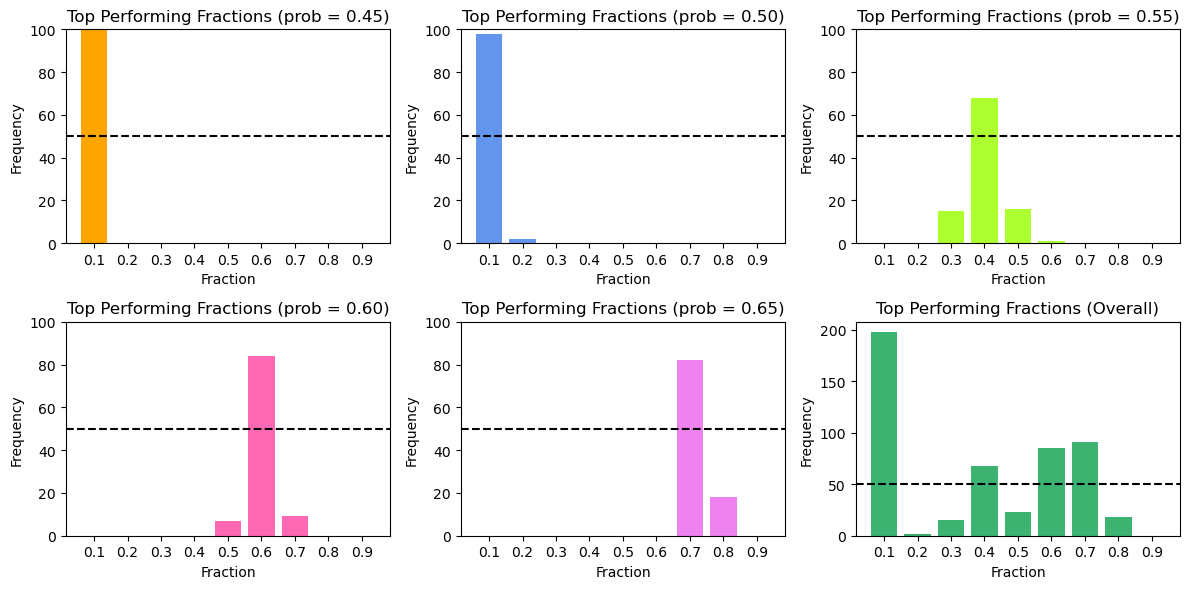

Execution time: 21.42 seconds


In [ ]:
import time
start_time = time.time()

# Changeable variables
num_tries = 10000
bankroll = 10
lw=1
seed = 42
num_seeds = 100

np.random.seed(seed)
all_values = []
fractions = np.arange(0.1, 1.0, 0.1)
probabilities = np.arange(0.45, 0.6501, 0.05)
plot_num = 1

# SIMULATIONS
for prob in probabilities:
    seeds = np.random.choice(np.arange(1, num_seeds + 1), size=num_seeds, replace=False)
    for seed in seeds: # pick seeds at random using a unifrom distribution rather than sequential seeds for less bias.
        values = [] # contains all variables of a single simulation.
        for frac in fractions:    
            fractional = Kelly_functions.fractional_kelly(
                num_tries=num_tries, 
                bankroll=bankroll, 
                win_prob=prob, 
                fraction=frac, 
                seed=seed) 
            # seed is ever-changing but constant for all probabilities: mimics one person doing 3 different experimental groups
            values.append({
                'seed': seed,
                'fraction': frac,
                'probability': prob,
                'bankroll history': fractional})
        all_values.append(values)

# PLOTTING BANKROLL HISTORIES
plt.figure(figsize=(12, 4)) # plotting mean bankrolls for each probability
prob_means = Calculations.find_mean_bankroll_histories(all_values, probabilities, 'probability')
Plotting_functions.create_bankroll_history_plot(
    title = 'Mean Probability Bankroll History (log scale)', 
    rows=1, columns=2, plot_num=1)
plt.yscale('log')
for prob in probabilities:
    plt.plot(prob_means[prob], lw=lw, label = f'prob: {prob:.2f}')
plt.legend()
stop = int(num_tries / 100)
Plotting_functions.create_bankroll_history_plot(
    title = f'Mean Probability Bankroll history from: [{0} to {int(stop)}]', 
    rows=1, columns=2, plot_num=2)
plt.xlim(0, stop)
for prob in probabilities:
    plt.plot(prob_means[prob], lw=lw, label = f'prob: {prob:.2f}')
plt.ylim(0, Calculations.find_max_within_range(0, stop, prob_means, probabilities) + 100)
plt.legend()
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 4)) # plotting mean bankrolls for each fraction
frac_means = Calculations.find_mean_bankroll_histories(all_values, fractions, 'fraction')
Plotting_functions.create_bankroll_history_plot(
    title = 'Mean Fraction Bankroll History (log scale)', 
    rows=1, columns=2, plot_num=1)
plt.yscale('log')
for frac in fractions:
    plt.plot(frac_means[frac], lw=lw, label = f'frac: {frac:.2f}')
plt.legend()
stop = int(num_tries / 100)
Plotting_functions.create_bankroll_history_plot(
    title = f'Mean Fraction Bankroll history from: [{0} to {int(stop)}]', 
    rows=1, columns=2, plot_num=2)
plt.xlim(0, stop)
for frac in fractions:
    plt.plot(frac_means[frac], lw=lw, label = f'frac: {frac:.2f}')
plt.ylim(0, Calculations.find_max_within_range(0, stop, frac_means, fractions) + 100)
plt.legend()
plt.tight_layout()
plt.show()

top_fracs = Plotting_functions.count_optimal_fractions(all_values, fractions, probabilities)
plt.figure(figsize=(12, 6))
rows = 2
columns = 3
for i in range(len(probabilities)): # plotting the optimal functions
    prob = probabilities[i]  # ensure matching key
    counts_for_prob = top_fracs[1][prob]
    Plotting_functions.plot_optimal_fractions(
        rows, columns, i + 1,
        counts_for_prob,
        title=f'Top Performing Fractions (prob = {prob:.2f})',
        line=50
    )
    plt.ylim(0, num_seeds)
mean = Calculations.get_frequency_stats(top_fracs[0])[0]
Plotting_functions.plot_optimal_fractions(
    rows, columns, (rows * columns),
    top_fracs[0],
    title=f'Top Performing Fractions (Overall)',
    line=50
)
plt.tight_layout()
plt.show()

end_time = time.time()
print(f"Execution time: {end_time - start_time:.2f} seconds")

In [3]:
# CHI SQUARED TEST: Tests for significance in top performing fractions

for prob in top_fracs[1]:
    dict_stats = Calculations.get_frequency_stats(top_fracs[1][prob])
    counts = top_fracs[1][prob].values()
    n = dict_stats[1]
    mean_list = [dict_stats[0]] * n
    chi_squared = Calculations.chi_squared_test(dict_stats[2], mean_list)
    print(f'Prob: {prob:.2f} \nChi-squared: {chi_squared}\n') 

Prob: 0.45 
Chi-squared: 799.9999999999998

Prob: 0.50 
Chi-squared: 764.7199999999998

Prob: 0.55 
Chi-squared: 359.5399999999999

Prob: 0.60 
Chi-squared: 546.74

Prob: 0.65 
Chi-squared: 534.32



In [4]:
# BINOMIAL DISTRIBUTION: Tests for significance in observed 50 or more top fractions being 1 specific fraction
# P(X = x) = (n x) p^x * q^n-x

threshold_prob = 0
for i in range(50, 101):
    threshold_prob += (math.factorial(100))/(math.factorial(i) * math.factorial(100 - i)) * (0.11 ** i) * (0.89 ** (100 - i))
print(f'probability of 50/100 OR MORE in one bin assuming uniformity: {threshold_prob:.2E}')

probability of 50/100 OR MORE in one bin assuming uniformity: 3.97E-22
